# Mandatory assignment 1: Data analysis project - ATP Tennis scores

Vision: Programming is more than writing code. The ultimate goal of the projects in this course
is that you learn to formulate a programming problem of your own choice, and find your own way
to solve it, and present the results. The bullets below are minimum requirements, but otherwise it is
very much up to you, what you will like to do with your project. I hope to see some creative ideas!

We have chosen to approach this project with a kaggle data folder called "Association of Tennis Professionals Matches" and this project will therefore take its starting point in mens atp tennis results and applied statistics. Through the assignment we will examine the descriptive elements of the dataset, inspect the individual players and different tournament levels. We will as well try to illustrate our results through tables, figures, plots and even heat maps for a better mediation as well as a coding level. The project consist of different sections including package import, data structure and analysis and descriptive analysis as well as graphical analysis which are trying to describe, analyse and derive useful conclusions in the realm of ATP results from 2000-2016. 

* **Step 1: Package import:** The first part of code in our project is the use of libraries with essential packages of panda, numpy and glob which is respectively for data structuring and especially arrays and pathnames. On top of that we import statsmodels, matplotlib, geoplot and geopandas for statsitcal modelling, plots and figures as well as heat maps.  

In [174]:

%matplotlib inline
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import math
import sqlite3
import datetime as dt
import sqlalchemy
from numpy.random import random
from sqlalchemy import create_engine
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from pandas import DataFrame as df
from scipy.stats import trim_mean, kurtosis
from scipy.stats.mstats import mode, gmean, hmean

* **Step 2: Datapath and merge:** Our data project demand one compiled file for further examination and we do therefore have to merge all years between 2000 and 2016 into one csv file called data. We use the element "for" in the range of 2000-2016 to choose all files which have the name "atp_matches_xxxx.csv". Dtype is declaring which kind of variable we include and we declare winner hand, tourney id, tourney date as strings. In the end we concatenate the data and call it data_tennis, which is our main data.

#behøver man dtype eller burde man så ikke gøre det for alle

In [175]:
DATAPATH = "/Users/Christofferku/Desktop/atp-matches-dataset/"

data = []

for i in range(2000, 2014):
    data.append(pd.read_csv(DATAPATH + "atp_matches_" + str(i) + ".csv", dtype={"winner_hand": str,"tourney_id": str,"tourney_date": str}))

data_tennis = pd.concat(data)

* **Step 3: Changing names of Variables and clear blank cells:** First of all we replace the abbreviated column titles with more meaningful labels. We do then index the master dataset and assign the new name "Tennis_subset" and remove all rows with blank cells in the end for a better statistical analysis. MÅSKE OUTLIER

In [176]:

# We are assigning all variables with a new name
data_tennis.columns = ['Tourney_id','Tourney_name','Surface','Draw_size','Tourney_level','Date',
                      'Match_number','Winner_id', 'Winner_seed', 'Winner_entry',
       'Winner_name', 'Winner_hand', 'Winner_hight', 'Winner_country', 'Winner_age',
       'Winner_rank', 'Winner_rank_points', 'Loser_id', 'Loser_seed',
       'Loser_entry', 'Loser_name', 'Loser_hand', 'Loser_hight', 'Loser_country',
       'Loser_age', 'Loser_rank', 'Loser_rank_points', 'Match_score', 'best_of',
       'round', 'minutes', 'Winner_aces', 'Winner_double_faults', 'Winner_serve_points', 'Winner_1st_serve_in', 'Winner_1st_serve_won',
       'Winner_2nd_serve_won', 'Winner_serve_games_played', 'Winner_break_points_saved', 'Winner_break_points_faced', 'Loser_aces', 'Loser_double_faults','Loser_serve_points', 'Loser_1st_serve_in', 'Loser_1st_serve_won', 'Loser_2nd_serve_won', 'Loser_serve_games_played', 'Loser_break_points_saved',
       'Loser_break_points_faced']

# we are indexing the master dataset and assigning it a new name: "Tennis_subset"
Tennis_subset = data_tennis.loc[:,['Tourney_id', 'Tourney_name', 'Surface', 'Draw_size', 'Tourney_level', 'Date','Match_number', 'Winner_id', 'Winner_seed',
       'Winner_name', 'Winner_hand', 'Winner_hight', 'Winner_country', 'Winner_age',
       'Winner_rank', 'Loser_id', 'Loser_seed',
       'Loser_entry', 'Loser_name', 'Loser_hand', 'Loser_hight', 'Loser_country',
       'Loser_age', 'Loser_rank','minutes', 'Winner_aces', 'Winner_double_faults', 'Winner_serve_points', 'Winner_1st_serve_in', 'Winner_1st_serve_won',
       'Winner_2nd_serve_won', 'Winner_serve_games_played', 'Winner_break_points_saved', 'Winner_break_points_faced', 'Loser_aces', 'Loser_double_faults','Loser_serve_points', 'Loser_1st_serve_in', 'Loser_1st_serve_won', 'Loser_2nd_serve_won', 'Loser_serve_games_played', 'Loser_break_points_saved',
       'Loser_break_points_faced']]

Tennis_subset1 = Tennis_subset.loc[:,['Draw_size', 'Winner_seed', 'Winner_hight', 'Winner_age', 'Winner_rank', 'Winner_aces', 'Winner_double_faults', 'Loser_seed', 'Loser_hight', 'Loser_age', 'minutes', 'Loser_double_faults', 'Loser_aces']]
Tennis_subset1 = Tennis_subset1[Tennis_subset1['Draw_size'].notnull()]
Tennis_subset1 = Tennis_subset1[Tennis_subset1['minutes'].notnull()]
Tennis_subset1 = Tennis_subset1[Tennis_subset1['Winner_seed'].notnull()]
Tennis_subset1 = Tennis_subset1[Tennis_subset1['Winner_hight'].notnull()]
Tennis_subset1 = Tennis_subset1[Tennis_subset1['Winner_age'].notnull()]
Tennis_subset1 = Tennis_subset1[Tennis_subset1['Winner_rank'].notnull()]
Tennis_subset1 = Tennis_subset1[Tennis_subset1['Winner_aces'].notnull()]
Tennis_subset1 = Tennis_subset1[Tennis_subset1['minutes'].notnull()]
Tennis_subset1 = Tennis_subset1[Tennis_subset1['Winner_double_faults'].notnull()]
Tennis_subset1 = Tennis_subset1[Tennis_subset1['Loser_seed'].notnull()]
Tennis_subset1 = Tennis_subset1[Tennis_subset1['Loser_hight'].notnull()]
Tennis_subset1 = Tennis_subset1[Tennis_subset1['Loser_age'].notnull()]
Tennis_subset1 = Tennis_subset1[Tennis_subset1['Loser_double_faults'].notnull()]
Tennis_subset1 = Tennis_subset1[Tennis_subset1['Loser_aces'].notnull()]

From the descriptive table we see 4158 ovservations with an avarage winner age of 25,9 and height of 186,1 with a standard deviation of respectively 3,4 and 6,3. The oldest winner of an ATP match is 36.1 and the youngest 17,8 where the oldest loser age is 36,7 and youngest 17,3. Furthermore we see the avarage loser age is 26.2 and length of the mean match is 114,7 minutes or almost two hours. 2015. A winners hight was between 163 cm and 208 cm, which implies that there is a maximum height difference on 45 cm. The mean height is 186,6 cm which is almost 10 cm higher than the average man. If you are taller than the average man you, therefore, have better chances to be a professional tennis player. The average age for a tennis player was 26 years old while the youngest player was as young as 15 years old. No player is more than 38 years old so you have to start young if young want to become a good player.

* **Step 4: Print a descriptive table:** From the cell above we use the "Tennis_subset1" and make a descriptive table using round for 2 decimals. As we see in the result we have only included some of the variables from the original dataset.  

In [177]:
# description of the subset1
round(Tennis_subset1.describe(),2)

,Draw_size,Winner_seed,Winner_hight,Winner_age,Winner_rank,Winner_aces,Winner_double_faults,Loser_seed,Loser_hight,Loser_age,minutes,Loser_double_faults,Loser_aces
count,3708.00,3708.00,3708.00,3708.00,3708.00,3708.00,3708.00,3708.00,3708.00,3708.00,3708.00,3708.00,3708.00
mean,67.03,5.92,185.97,25.52,15.40,7.19,2.35,9.35,185.80,25.94,114.46,3.06,5.58
std,38.49,5.73,6.12,3.22,15.65,5.63,2.10,7.65,6.53,3.13,44.98,2.39,5.21
min,8.00,1.00,168.00,17.80,1.00,0.00,0.00,1.00,168.00,17.13,11.00,0.00,0.00
25%,32.00,2.00,183.00,23.15,4.00,3.00,1.00,4.00,183.00,23.68,81.00,1.00,2.00
50%,56.00,4.00,185.00,25.46,10.00,6.00,2.00,7.00,185.00,25.91,106.00,3.00,4.00
75%,96.00,8.00,188.00,27.63,22.00,10.00,3.00,13.00,190.00,28.08,138.00,4.00,8.00
max,128.00,33.00,208.00,35.53,124.00,50.00,23.00,33.00,208.00,36.71,353.00,23.00,51.00


From the table and graph below we see the developement of double faults for winners and losers in the period 2000-2013. The variable double faults is created as a ratio between all double faults in one year divided with number of matches and do therefore not depend on matches played. From the graph a clear negative trend is occuring for both winners and losers and 2007 is the year with the fewest double faults for winners. The largest number of faults compared to matches for both winners and losers are the year of 2000 and we assume this trend is decreasing when you go back in time.  
* **Step 5: Faults through time:** We create a dataset we can use for the description of double faults made in the atp series. First of all we use our "Tennis_subset and choose the variables of ID, Winner_double_faults, Loser_double_faults and minutes. We do then count the observation of minutes given a certain year from the first 4 character of the string "Tourney_id" so we can get a total match variable. We do then create our faults ration variable with number of faults in a given year divided with number of games for both winners and losers. In the end we plot the two arrays 'doub. faults lose match', 'doub. faults win match' on the second axis and year on the first axis. 

   Tourney_id  minutes  Winner_double_faults  Loser_double_faults  \
0        2000     2942                9060.0              11479.0   
1        2001     2969                9006.0              11536.0   
2        2002     2830                8419.0              10698.0   
3        2003     2853                8197.0              10308.0   
4        2004     2879                7980.0              10394.0   
5        2005     2911                7610.0               9764.0   
6        2006     2909                7104.0               9285.0   
7        2007     2806                6327.0               8667.0   
8        2008     2765                6492.0               8432.0   
9        2009     2727                6661.0               8389.0   
10       2010     2716                6534.0               8375.0   
11       2011     2687                6593.0               8420.0   
12       2012     2681                6492.0               8437.0   
13       2013     2613            

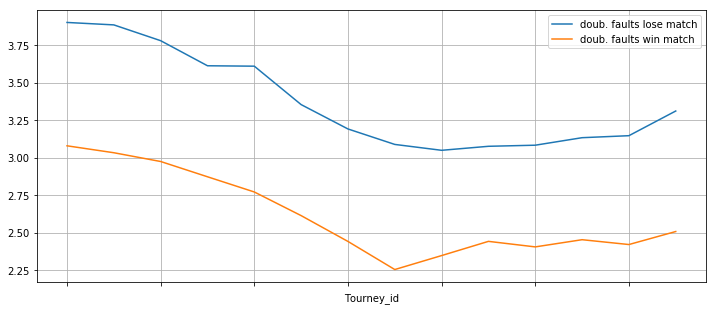

In [227]:
Historic_faults = Tennis_subset.loc[:,["Tourney_id", "Winner_double_faults", "Loser_double_faults", "minutes"]] 
Historic_faults = Historic_faults.groupby(Tennis_subset['Tourney_id'].str[:4]).agg({"minutes":"count", "Winner_double_faults":'sum', "Loser_double_faults":'sum'}).fillna(0).sort_values(["Tourney_id"], ascending=True).reset_index()

Historic_faults['doub. faults win match'] = Historic_faults['Winner_double_faults'] / Time_evolve1['minutes']
Historic_faults['doub. faults lose match'] = Historic_faults['Loser_double_faults'] / Time_evolve1['minutes']

print(Historic_faults)

Historic_faults.plot(x='Tourney_id', y=['doub. faults lose match', 'doub. faults win match'], figsize=(12,5), grid=True)


TABLE X lists the players from ATP with the most aces. As seen Ivo Karlovic is the player with the most aces in 2015. Karlovic has more than 1.400 aces which are almost 2.000 aces more than John Isner, who is number two on the list. In TABLE Y the ten players, who play in the Grand Slam tournaments, with the most aces are listed. The first person in table Y is Kevin Anderson, how has made approximately 350 aces these tournaments. From TABLE X Anderson is number three on the list with around 1.100 aces. It is there easy to conclude that Anderson scores the most aces in tournaments outside the Grand Slams. Roughly 750 aces did Anderson make in other tournaments outside the Grand Slams. From this, we can conclude the Karlovic and Isner are great at making aces but aren't as good as Anderson to make aces on the players who played in the 2015 Grand Slam tournaments.  From TABLE Y we see that that there are around 150 aces apart from Anderson and Feliciano Lopez, who are the 10th player with the most aces in the Grand Slams. Karlovic has scored more than twice as many aces compared to Sam Querrey who is number ten on the list in TABLE X.  Even though Roger Federer and Novak Djokovic were some of the best players in 2015 they appear on TABLE Y as number eight and nine. Their names cannot be found in TABLE X, which might tell us that they don’t play as many tournaments as for instance Anderson, Karlovic, and Isner.

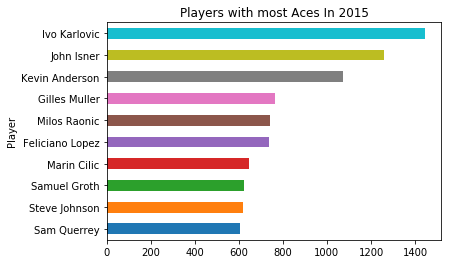

In [23]:
Aces_by_winner = Tennis_age_15.groupby(['Winner_name']).agg({'Winner_aces':'sum'}).fillna(0).sort_values(['Winner_aces'], ascending=False)
Aces_by_loser = Tennis_age_15.groupby(['Loser_name']).agg({'Loser_aces':'sum'}).fillna(0).sort_values(['Loser_aces'], ascending=False)
dfs = [Aces_by_winner,Aces_by_loser]
r = pd.concat(dfs).reset_index().fillna(0)
r['aces'] = r['Loser_aces']+r['Winner_aces']
final = r.groupby('index').agg({'aces':'sum'}).sort_values('aces',ascending=False).head(10)
final = final.reset_index()
final.columns = ['Player','Aces']
final = final.sort_values('Aces',ascending=True)

final.plot('Player','Aces', kind='barh', title='Players with most Aces In 2015', legend=False)

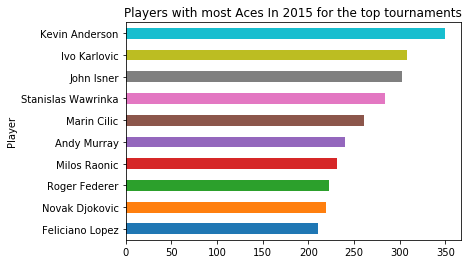

In [24]:

Tennis_age_15_level = Tennis_age_15.loc[Tennis_age_15['Tourney_level'] == 'G', :]

sw = Tennis_age_15_level.groupby(['Winner_name']).agg({'Winner_aces':'sum'}).fillna(0).sort_values(['Winner_aces'], ascending=False)
sl = Tennis_age_15_level.groupby(['Loser_name']).agg({'Loser_aces':'sum'}).fillna(0).sort_values(['Loser_aces'], ascending=False)
dfs = [sw,sl]
r = pd.concat(dfs).reset_index().fillna(0)
r['aces'] = r['Loser_aces']+r['Winner_aces']
final = r.groupby('index').agg({'aces':'sum'}).sort_values('aces',ascending=False).head(10)
final = final.reset_index()
final.columns = ['Player','Aces']
final = final.sort_values('Aces',ascending=True)

final.plot('Player','Aces', kind='barh', title='Players with most Aces In 2015 for the top tournaments', legend=False)

In [25]:
Grand_slams = Tennis_subset.loc[Tennis_subset['Tourney_level'] == 'G', ["Tourney_name", "Winner_name", "Surface"]]

Grand_slams1 = Grand_slams.groupby(['Tourney_name', "Surface"]).agg({"Winner_name":'count'}).fillna(0).sort_values(["Winner_name"], ascending=False).reset_index()

Grand_slams_table = Grand_slams1.loc[:,["Tourney_name", "Surface"]]

Grand_slams_table.head()


,Tourney_name,Surface
0,Australian Open,Hard
1,Roland Garros,Clay
2,US Open,Hard
3,Wimbledon,Grass


In [37]:

Tennis_subset['Match_number2'] = Tennis_subset['Match_number'] + 1
Tennis_subset['Tourney_win'] = np.where(Tennis_subset['Match_number2'] == Tennis_subset['Draw_size'], 1 , 0)


Grand_slams_players = Tennis_subset.loc[Tennis_subset['Tourney_level'] == 'G', ["Tourney_name", "Winner_name", "Tourney_win"]]
Grand_slams_players1 = Grand_slams_players.loc[Grand_slams_players['Tourney_win'] == 1, ["Tourney_name", "Winner_name", "Tourney_win"]]

Grand_slams_players2 = Grand_slams_players.groupby(["Tourney_name", "Winner_name"]).agg({"Tourney_win":'sum'}).fillna(0).sort_values(["Tourney_win"], ascending=False).reset_index()


#Grand_slams_players2 = Grand_slams_players1.loc[Grand_slams_players1["Tourney_win"] == "1"]


Grand_slams_players2.head(30)

#X.loc[X['id'] > 1]

,Tourney_name,Winner_name,Tourney_win
0,Roland Garros,Rafael Nadal,9
1,Wimbledon,Roger Federer,7
2,Australian Open,Novak Djokovic,5
3,US Open,Roger Federer,5
4,Australian Open,Roger Federer,4
5,Australian Open,Andre Agassi,3
6,Wimbledon,Novak Djokovic,3
7,Wimbledon,Rafael Nadal,2
8,Roland Garros,Gustavo Kuerten,2
9,US Open,Rafael Nadal,2


In [77]:
Grand_slams_total_Player = Grand_slams_players2.loc[:,["Winner_name", "Tourney_win", "Tourney_sum"]] 

Grand_slams_total_Player = Grand_slams_total_Player.groupby(["Winner_name"]).agg({"Tourney_win":'sum'}).fillna(0).sort_values(["Tourney_win"], ascending=False).reset_index()

Grand_slams_total_Player.head(10)

,Winner_name,Tourney_win
0,Roger Federer,17
1,Rafael Nadal,14
2,Novak Djokovic,10
3,Andre Agassi,3
4,Gustavo Kuerten,2
5,Lleyton Hewitt,2
6,Marat Safin,2
7,Stanislas Wawrinka,2
8,Andy Murray,2
9,Pete Sampras,2
